In [1]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
TEST_SIZE = 0.2


def vectorization_TF_IDF(DATASET, text_field_name, label_name):

    X_train, X_test, y_train, y_test = train_test_split( DATASET[text_field_name] ,
                                                    DATASET[label_name],
                                                    train_size=0.80, random_state=28)

    encoder = preprocessing.LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.fit_transform(y_test)
    return X_train, X_test, y_train, y_test

def saving_results(results, path, file_name):

    results.to_csv(path + file_name,  index = False, sep=";")

def train_model(classifier, X_train_v, X_test_v, y_train, y_test):
    ini = time.time()
    classifier.fit(X_train_v, y_train)
    predictions = classifier.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))

    return timee , acuracia, precision, recall, f1_score, matriz_confusao

def get_tests_result(X_train_v, X_test_v, y_train, y_test):

    all_res = []
    ### MLPClassifier

    #print( "MLPClassifier")
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["MLPClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### AdaBoostClassifier

    #print( "AdaBoostClassifier: ")
    clf = AdaBoostClassifier(n_estimators= 50, learning_rate=1)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["AdaBoostClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### Voting_LR3_SVC1_ETC2
    #print( "Voting_LR3_SVC1_ETC2: ")
    ini = time.time()
    clf2 = LogisticRegression(random_state=0)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[3, 1, 2])
    clf2 = clf2.fit(X_train_v, y_train)
    clf5 = clf5.fit(X_train_v, y_train)
    clf6 = clf6.fit(X_train_v, y_train)
    eclf = eclf.fit(X_train_v, y_train)
    #Y_previsto_vc1 = eclf.predict(X_test_v.toarray())
    Y_previsto_vc1 = eclf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_previsto_vc1)
    precision = precision_score(y_test, Y_previsto_vc1, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_previsto_vc1)
    recall = recall_score(y_test, Y_previsto_vc1, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_previsto_vc1, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["Voting_LR3_SVC1_ETC2: ", timee , acuracia, precision, recall, f1_score])



    ### DecisionTreeClassifier
    #print( "DecisionTreeClassifier: ")
    clf = DecisionTreeClassifier(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["DecisionTreeClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### RandomForestClassifier
    #print( "RandomForestClassifier: " )
    clf = RandomForestClassifier(n_estimators=100, random_state=2)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["RandomForestClassifier: ", timee , acuracia, precision, recall, f1_score])




    ### ExtraTreesClassifier
    #print( "ExtraTreesClassifier: ")
    clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["ExtraTreesClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### LogisticRegression
    #print( "LogisticRegression: ")
    clf = LogisticRegression(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["LogisticRegression: ",  timee , acuracia, precision, recall, f1_score])



    ### svm
    #print( "svm: ")
    clf = svm.SVC()
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["svm: ",  timee , acuracia, precision, recall, f1_score])



    ### Stacking_scikit
    #print( "Stacking_scikit: ")
    clf1 = RandomForestClassifier(n_estimators=100, random_state=2)
    clf2 = LogisticRegression(random_state=0)
    clf3 = SVC()
    clf4 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    estimators = [('rf', clf1), ('lr', clf2), ('svc', clf3), ('etc', clf4)]
    ini = time.time()
    clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression(), n_jobs=None)
    clf.fit(X_train_v, y_train)
    Y_Previsto_stacking = clf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_stacking)
    precision = precision_score(y_test, Y_Previsto_stacking, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_stacking)
    recall = recall_score(y_test, Y_Previsto_stacking, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_stacking, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["Stacking_scikit: ",  timee , acuracia, precision, recall, f1_score])



    ### XGBClassifier
    #print( "XGBClassifier: ")
    #clf = XGBClassifier(eval_metric='mlogloss' )
    #timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    #all_res.append(["XGBClassifier: ",  timee , acuracia, precision, recall, f1_score])



    ### OneVsRestClassifier_RF
    #print( "OneVsRest_RF: ")
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    ovr = OneVsRestClassifier(clf)
    ini = time.time()
    ovr.fit(X_train_v, y_train)
    Y_Previsto_OVR_RF = ovr.predict(X_test_v)
    fim = time.time()


    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_OVR_RF)
    precision = precision_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_OVR_RF)
    recall = recall_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["OvR_RF: ",  timee , acuracia, precision, recall, f1_score])

    return pd.DataFrame( all_res, columns=["ALGORITHM","TIME","ACCURACY","PRECISION","RECALL", "F1_SCORE"])

feat = ['Idade', 'Peso Kg', 'Cor da pele', 'ACTN3',
       'AGT', 'ECA', 'Score Força%', 'Score Resistência %',
       'Pré CK (U/L)', 'Pós CK (U/L)', 'Pré CK MB U/L', 'Pós CK MB U/L',
       'Pré Lactato (mmol/L)', 'Pós Lactato (mmol/L)', 'Pré LDH (U/L)',
       'Pós LDH (U/L)', 'Pré AST (U/L)', 'Pós AST (U/L)',
       'Pré Albumina (g/dL)', 'Pós Albumina (g/dL)', 'Pré TGP (g/dL)',
       'Pós TGP (g/dL)', 'Pré GGT U/L', 'Pós GGT U/L', 'Pré Ac. Úrico (mg/dL)',
       'Pós Ac. Úrico (mg/dL)', 'Pré TFG   (ml/min/1.73 m2)',
       'Pós TFG   (ml/min/1.73 m2)', 'Pré Ureia mg/dL', 'Pós Ureia mg/dL',
       'Pré creatinina mg/dL', 'Pós creatinina mg/dL',
       'Delta CREATININA mg/dL', 'Pré Fósforo mg/dL', 'Pós Fósforo mg/dL',
       'Pré Proteína Total (g/dL)', 'Pós Proteína Total (g/dL)',
       'Pré FE (ug/dL)', 'Pós FE (ug/dL)', 'Pré calcio mg/dL',
       'Pós calcio mg/dL', 'Pré Potássio mmol/L', 'Pós Potássio mmol/L',
       'Glicose pré', 'Glicose pós', 'Pré Sódio mmol/L', 'Pós Sódio mmol/L',
       'Pré Magnésio mg/dL', 'Pós Magnésio mg/dL', 'Pré Cloro mmol/L',
       'Pós Cloro mmol/L',
       'Osmolalidade sérica PRÉ BD4(mOsm/kg): 1,86(Na + K) + 1,15(Gli /18) + (Ureia/6) + 14\t\t\t',
       'Osmolalidade sérica PÓS BD4(mOsm/kg): 1,86(Na + K) + 1,15(Gli /18) + (Ureia/6) + 14\t\t\t',
       'Pré RCB 10^6/mm³', 'Pós RCB 10^6/mm³', 'Pré HGB g/dL', 'Pós HGB g/dL',
       'Pré HCT %', 'Pós HCT %', 'Pré MCV fL', 'Pós MCV fL', 'Pré MCH pg',
       'Pós MCH pg', 'Pré MCHC g/dL', 'Pós MCHC g/dL', 'Pré PLT 10³/mm³',
       'Pós PLT 10³/mm³', 'Pré RDW %', 'Pós RDW %', 'Pré RET %', 'Pós RET %',
       'Pré WBC 10³/mm³', 'Pós WBC 10³/mm³', 'Pré NEUT %', 'Pós NEUT %',
       'Pré LINF %', 'Pós LINF %', 'Pré MONO %', 'Pós MONO %', 'Pré EOS %',
       'Pós EOS %', 'Pré BASO %', 'Pós BASO %', 'massa magra', 'MCT KG', 'ESTATURA', 'vo2max estimado',
       'Handgrip     Dom.', 'Handgrip Cont.', '% gordura']

label_rabdomiolise = "Rabdomiólise"
label_lesao = "Lesão Renal Aguda"




In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/'
file = 'dados.xlsx'
DATASET = pd.read_excel(path + file)

#dropando colunas "inúteis"
DATASET = DATASET.drop(columns=['Ano','Missão','Aluno'])

#No excel por algum motivo todas as colunas numéricas exeto 'ACTN3','AGT','ECA' e 'BDKRB2' estão como categóricas, então temos que passá-las para numericas
for coluna in DATASET.columns:
    if coluna == 'ACTN3' or coluna == 'AGT' or coluna == 'ECA' or coluna == 'BDKRB2':
        continue
    if DATASET[coluna].dtype == 'object':
        DATASET[coluna] = pd.to_numeric(DATASET[coluna], errors='coerce')


DATASET


Mounted at /content/drive


Idade  Peso Kg  Cor da pele ACTN3  AGT  ECA   BDKRB2  Score Força%  \
0     33.0     88.0          1.0    XX   MT   ID  (-9,-9)          25.0   
1     26.0     74.0          1.0    RR   MT   II  (+9,-9)          50.0   
2     26.0     76.0          1.0    RX   MM   ID  (+9,+9)          50.0   
3     25.0     84.0          1.0    RR   TT   DD  (+9,-9)           NaN   
4     33.0     82.0          1.0    RR   MT   II  (+9,-9)          50.0   
..     ...      ...          ...   ...  ...  ...      ...           ...   
462   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
463   27.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
464   28.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
465   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
466   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   

     Score Resistência %  Pré CK (U/L)  ...  Pós BASO %  Lesão Renal Aguda  \
0                   75.0         337.0  ...         0.1              False   
1                   50.0         687.0  ...         0.2              False   
2                   50.0         841.0  ...         0.3              False   
3                    NaN         363.0  ...         0.9              False   
4                   50.0         192.0  ...         0.1              False   
..                   ...           ...  ...         ...                ...   
462                  NaN         231.0  ...         NaN              False   
463                  NaN         649.0  ...         NaN              False   
464                  NaN         274.0  ...         NaN              False   
465                  NaN         176.0  ...         NaN              False   
466                  NaN         168.0  ...         NaN              False   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False        75.52    84.3     181.5            50.85   
1            True        69.49    75.9     171.0            51.98   
2            True        72.07    79.2     174.0            52.42   
3            True        75.26    84.3     178.0            50.68   
4            True        66.26    79.6     182.0            47.64   
..            ...          ...     ...       ...              ...   
462         False          NaN    82.8     182.0              NaN   
463         False          NaN    75.1     170.0              NaN   
464         False          NaN    82.7     179.5              NaN   
465         False          NaN    80.5     181.0              NaN   
466         False          NaN    85.8     178.0              NaN   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0      10.05  
1                 42.0            43.0       6.08  
2                 49.5            49.5       8.72  
3                 60.0            57.0      10.61  
4                 51.0            49.0      14.84  
..                 ...             ...        ...  
462               56.0            59.0        NaN  
463               48.0            60.0        NaN  
464               58.0            52.0        NaN  
465               60.0            50.0        NaN  
466               55.0            56.0        NaN  

[467 rows x 93 columns]

**PREPRAÇÃO DOS DADOS**

CASO 1 - Preencher NaN

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


DATASET_fill_mean = DATASET.copy()
DATASET_fill_mean = DATASET_fill_mean.replace('-', np.nan)

# Preencher numéricos com média
imputer_mean = SimpleImputer(strategy='mean')
X_numeric = DATASET_fill_mean.select_dtypes(include=['float64', 'int64'])
DATASET_fill_mean[X_numeric.columns] = imputer_mean.fit_transform(X_numeric)

# Preencher categóricos com moda
imputer_freq = SimpleImputer(strategy='most_frequent')
X_categorical = DATASET_fill_mean.select_dtypes(include=['object', 'category'])
DATASET_fill_mean[X_categorical.columns] = imputer_freq.fit_transform(X_categorical)

X_fill_mean = DATASET_fill_mean.drop(columns=['Rabdomiólise'])
y_fill_mean = DATASET_fill_mean['Rabdomiólise']

X_fm_Train, X_fm_Test, y_fm_Train, y_fm_Test = train_test_split(X_fill_mean,y_fill_mean,test_size=TEST_SIZE)

scaler = MinMaxScaler()
X_numeric_train = X_fm_Train.select_dtypes(include=['float64', 'int64'])
X_numeric_test = X_fm_Test.select_dtypes(include=['float64', 'int64'])

X_fm_Train[X_numeric_train.columns] = scaler.fit_transform(X_numeric_train)
X_fm_Test[X_numeric_test.columns] = scaler.transform(X_numeric_test)
X_fm_Train

Idade   Peso Kg  Cor da pele ACTN3 AGT ECA   BDKRB2  Score Força%  \
51   0.743590  0.790514      0.50000    RR  MT  ID  (+9,-9)      0.222226   
10   0.743590  0.750988      0.50000    RR  MT  II  (+9,-9)      0.192500   
266  0.820513  0.820158      1.00000    RR  MM  ID  (+9,-9)      0.187500   
464  0.717949  0.716098      1.00000    RR  MT  ID  (+9,-9)      0.222226   
107  0.717949  0.760870      1.00000    RR  MT  ID  (+9,-9)      1.000000   
..        ...       ...          ...   ...  ..  ..      ...           ...   
184  0.846154  0.671937      0.00000    RR  MT  ID  (+9,+9)      0.312500   
162  0.820513  0.849802      0.00000    RR  TT  ID  (+9,+9)      0.375000   
199  0.897436  0.750988      0.00000    RX  MM  ID  (+9,+9)      0.187500   
388  0.692308  0.759881      0.50000    RR  MT  ID  (+9,-9)      0.222226   
420  0.743812  0.861660      0.58026    RR  MT  ID  (+9,-9)      0.222226   

     Score Resistência %  Pré CK (U/L)  ...  Pré BASO %  Pós BASO %  \
51              0.777886      0.020466  ...    0.000000    0.071429   
10              0.817500      0.020917  ...    0.029851    0.000000   
266             0.812500      0.262051  ...    0.029851    0.071429   
464             0.777886      0.013249  ...    0.059701    0.087817   
107             0.000000      0.002706  ...    0.000000    0.000000   
..                   ...           ...  ...         ...         ...   
184             0.687500      0.054688  ...    0.014925    0.000000   
162             0.625000      0.034955  ...    0.029851    0.007143   
199             0.812500      0.001804  ...    0.014925    0.000000   
388             0.777886      0.033884  ...    0.041045    0.087817   
420             0.777886      0.007386  ...    0.059701    0.023810   

     Lesão Renal Aguda  massa magra    MCT KG  ESTATURA  vo2max estimado  \
51               False     0.841385  0.795122  0.909091         0.837628   
10               False     0.790457  0.733659  0.922597         0.889693   
266              False     0.853046  0.772683  0.896623         0.910695   
464              False     0.830260  0.806829  0.932468         0.837956   
107              False     0.821752  0.766829  0.929870         0.903283   
..                 ...          ...       ...       ...              ...   
184              False     0.724774  0.721951  0.893506         0.925874   
162              False     0.803070  0.804878  0.903896         0.888281   
199              False     0.766421  0.737073  0.922078         0.893223   
388              False     0.830260  0.774634  0.971429         0.837956   
420              False     0.830260  0.776309  0.910515         0.837956   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
51            0.618750        0.465909   0.567260  
10            0.593750        0.522727   0.440158  
266           0.750000        0.613636   0.469337  
464           0.725000        0.590909   0.528336  
107           0.625000        0.500000   0.493076  
..                 ...             ...        ...  
184           0.750000        0.659091   0.644411  
162           0.700000        0.602273   0.655292  
199           0.700000        0.568182   0.627596  
388           0.750000        0.750000   0.528336  
420           0.661156        0.573914   0.528336  

[373 rows x 92 columns]

CASO 2 - Dropar colunas com 50% mais de NaN e depois dropar linhas com NaN

In [6]:
taxa_drop = 0.5

#Dropando as colunas com valores NULL maiores que taxa_drop
DATASET_drop_cols50 = DATASET.copy()

DATASET_drop_cols50 = DATASET_drop_cols50.loc[:, DATASET_drop_cols50.isnull().mean() < taxa_drop]

DATASET_drop_cols50 = DATASET_drop_cols50.dropna()


#Codificar colunas categóricas
label_encoder = preprocessing.LabelEncoder()
for coluna in DATASET_drop_cols50.select_dtypes(include=['object', 'category']).columns:
    DATASET_drop_cols50[coluna] = label_encoder.fit_transform(DATASET_drop_cols50[coluna].astype(str))

X_drop_cols50 = DATASET_drop_cols50.drop(columns=['Rabdomiólise'])
scale_obj = preprocessing.StandardScaler()
X_drop_cols50 = scale_obj.fit_transform(X_drop_cols50)

y_drop_cols50 = DATASET_drop_cols50['Rabdomiólise']

X_drop_cols50_Train, X_drop_cols50_Test, y_drop_cols50_Train, y_drop_cols50_Test = train_test_split(X_drop_cols50,y_drop_cols50,test_size=TEST_SIZE)


DATASET_drop_cols50

Idade  Peso Kg  Cor da pele  ACTN3  AGT  ECA  BDKRB2  Score Força%  \
0     33.0     88.0          1.0      3    1    1       2          25.0   
1     26.0     74.0          1.0      0    1    2       1          50.0   
2     26.0     76.0          1.0      1    0    1       0          50.0   
4     33.0     82.0          1.0      0    1    2       1          50.0   
5     31.0     92.0          1.0      3    1    1       2         100.0   
..     ...      ...          ...    ...  ...  ...     ...           ...   
338   28.0     87.0          1.0      3    2    0       1          62.5   
339   27.0     78.5          1.0      0    0    0       2          50.0   
340   25.0     85.1          1.0      3    2    1       2          37.5   
342   28.0     85.0          1.0      0    1    1       2          50.0   
343   28.0     81.0          1.0      3    2    0       1          62.5   

     Score Resistência %  Pré CK (U/L)  ...  Pós BASO %  Lesão Renal Aguda  \
0                   75.0         337.0  ...         0.1              False   
1                   50.0         687.0  ...         0.2              False   
2                   50.0         841.0  ...         0.3              False   
4                   50.0         192.0  ...         0.1              False   
5                    0.0         437.0  ...         0.3              False   
..                   ...           ...  ...         ...                ...   
338                 37.5         105.0  ...         3.1              False   
339                 50.0         321.0  ...         0.2              False   
340                 62.5         233.0  ...         0.4              False   
342                 50.0         228.0  ...         0.4              False   
343                 37.5         468.0  ...         1.1               True   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False        75.52   84.30     181.5            50.85   
1            True        69.49   75.90     171.0            51.98   
2            True        72.07   79.20     174.0            52.42   
4            True        66.26   79.60     182.0            47.64   
5            True        73.99   90.20     184.5            47.05   
..            ...          ...     ...       ...              ...   
338          True        74.20   83.60     175.0            50.56   
339          True        73.39   85.65     177.0            51.46   
340         False        72.78   80.00     177.5             0.00   
342          True        53.70   62.35     169.0            52.58   
343          True        74.20   83.60     175.0            50.56   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0      10.05  
1                 42.0            43.0       6.08  
2                 49.5            49.5       8.72  
4                 51.0            49.0      14.84  
5                 54.0            47.0      16.90  
..                 ...             ...        ...  
338               54.0            42.0       8.43  
339               48.0            52.0      10.92  
340               42.0            42.0       7.58  
342               44.0            38.0       9.73  
343               54.0            42.0       8.43  

[264 rows x 93 columns]

CASO 3 - fill_mean + transforma texto/categorias em números

In [7]:
DATASET_encoded = DATASET_fill_mean.copy()


label_encoder = preprocessing.LabelEncoder()
for coluna in DATASET_encoded.select_dtypes(include=['object', 'category']).columns:
    DATASET_encoded[coluna] = label_encoder.fit_transform(DATASET_encoded[coluna].astype(str))


X_encoded = DATASET_encoded.drop(columns=['Rabdomiólise'])
y_encoded = DATASET_encoded['Rabdomiólise']


X_encoded_Train, X_encoded_Test, y_encoded_Train, y_encoded_Test = train_test_split(
    X_encoded, y_encoded, test_size=TEST_SIZE)


scaler = preprocessing.StandardScaler()
X_encoded_Train = scaler.fit_transform(X_encoded_Train)
X_encoded_Test = scaler.transform(X_encoded_Test)

colunas_encoded = DATASET_encoded.columns
DATASET_encoded

Idade    Peso Kg  Cor da pele  ACTN3  AGT  ECA  BDKRB2  Score Força%  \
0     33.0  88.000000          1.0      3    1    1       2     25.000000   
1     26.0  74.000000          1.0      0    1    2       1     50.000000   
2     26.0  76.000000          1.0      1    0    1       0     50.000000   
3     25.0  84.000000          1.0      0    2    0       1     56.945274   
4     33.0  82.000000          1.0      0    1    2       1     50.000000   
..     ...        ...          ...    ...  ...  ...     ...           ...   
462   29.0  72.469128          2.0      0    1    1       1     56.945274   
463   27.0  72.469128          2.0      0    1    1       1     56.945274   
464   28.0  72.469128          2.0      0    1    1       1     56.945274   
465   29.0  72.469128          2.0      0    1    1       1     56.945274   
466   29.0  72.469128          2.0      0    1    1       1     56.945274   

     Score Resistência %  Pré CK (U/L)  ...  Pós BASO %  Lesão Renal Aguda  \
0              75.000000         337.0  ...    0.100000              False   
1              50.000000         687.0  ...    0.200000              False   
2              50.000000         841.0  ...    0.300000              False   
3              43.077114         363.0  ...    0.900000              False   
4              50.000000         192.0  ...    0.100000              False   
..                   ...           ...  ...         ...                ...   
462            43.077114         231.0  ...    0.368832              False   
463            43.077114         649.0  ...    0.368832              False   
464            43.077114         274.0  ...    0.368832              False   
465            43.077114         176.0  ...    0.368832              False   
466            43.077114         168.0  ...    0.368832              False   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False    75.520000    84.3     181.5        50.850000   
1            True    69.490000    75.9     171.0        51.980000   
2            True    72.070000    79.2     174.0        52.420000   
3            True    75.260000    84.3     178.0        50.680000   
4            True    66.260000    79.6     182.0        47.640000   
..            ...          ...     ...       ...              ...   
462         False    69.775015    82.8     182.0        47.478563   
463         False    69.775015    75.1     170.0        47.478563   
464         False    69.775015    82.7     179.5        47.478563   
465         False    69.775015    80.5     181.0        47.478563   
466         False    69.775015    85.8     178.0        47.478563   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0  10.050000  
1                 42.0            43.0   6.080000  
2                 49.5            49.5   8.720000  
3                 60.0            57.0  10.610000  
4                 51.0            49.0  14.840000  
..                 ...             ...        ...  
462               56.0            59.0  10.682962  
463               48.0            60.0  10.682962  
464               58.0            52.0  10.682962  
465               60.0            50.0  10.682962  
466               55.0            56.0  10.682962  

[467 rows x 93 columns]

**TESTANDO AS IAS SEM PCA**


PARA DATASET COM DROP NAS LINHAS COM NAN


In [8]:
results_drop_cols50 = get_tests_result(X_drop_cols50_Train, X_drop_cols50_Test, y_drop_cols50_Train, y_drop_cols50_Test)
saving_results(results_drop_cols50,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_dropcols.csv")

PARA ENCODED DATASET

In [9]:
results_encoded = get_tests_result(X_encoded_Train, X_encoded_Test, y_encoded_Train, y_encoded_Test)
saving_results(results_encoded,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_encoded.csv")

In [11]:
import csv
pca = PCA(n_components=DATASET_encoded.shape[1])
pca.fit(DATASET_encoded)
matriz_covarianca = pca.get_covariance()

with open( path + 'matrizCovarança.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(colunas_encoded)

    writer.writerows(matriz_covarianca)

print("Arquivo salvo com sucesso!")

Arquivo salvo com sucesso!


In [12]:
pca.explained_variance_

#A quantidade de variância explicada por cada um dos componentes selecionados. A estimativa da variância utiliza n_amostras - 1 grau de liberdade.

#Igual a n_componentes, os maiores autovalores da matriz de covariância de X.


array([2.82170334e+07, 8.65549880e+06, 4.11453538e+06, 1.12504737e+06,
       2.42455247e+05, 2.55672954e+04, 1.44008681e+04, 9.71423157e+03,
       7.20808712e+03, 5.41382083e+03, 4.48892802e+03, 2.96477450e+03,
       1.90159541e+03, 1.37308287e+03, 1.19928149e+03, 1.08762875e+03,
       9.72083727e+02, 8.05312444e+02, 7.81256895e+02, 6.27473040e+02,
       5.86196245e+02, 4.89204018e+02, 4.37201474e+02, 3.70091035e+02,
       3.01098117e+02, 2.77385582e+02, 2.40787572e+02, 2.28021248e+02,
       1.94530085e+02, 1.79849094e+02, 1.23866677e+02, 1.16968841e+02,
       1.06177255e+02, 9.41539690e+01, 8.22773520e+01, 6.90950318e+01,
       6.55959482e+01, 5.80003825e+01, 5.33931331e+01, 4.81597729e+01,
       4.27448439e+01, 4.07827109e+01, 3.06152943e+01, 2.90501324e+01,
       2.52278936e+01, 2.37439301e+01, 1.83564557e+01, 1.77272445e+01,
       1.66882010e+01, 1.31450245e+01, 1.13305214e+01, 9.46447172e+00,
       7.74817126e+00, 6.74701817e+00, 6.48858024e+00, 5.72911586e+00,
      

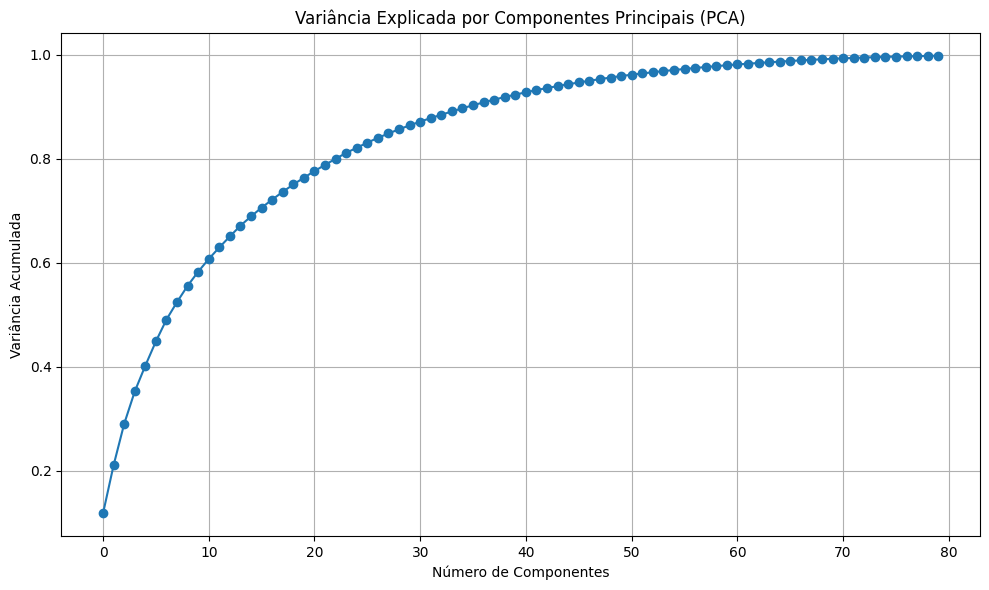

In [19]:
pca = PCA()
pca.fit(X_encoded_Train)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Explicada por Componentes Principais (PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Porcentagem da variância explicada por cada um dos componentes selecionados.

#Se n_components não for definido, todos os componentes serão armazenados e a soma das razões será igual a 1,0.

<ipython-input-14-217910864>:12: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-217910864>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


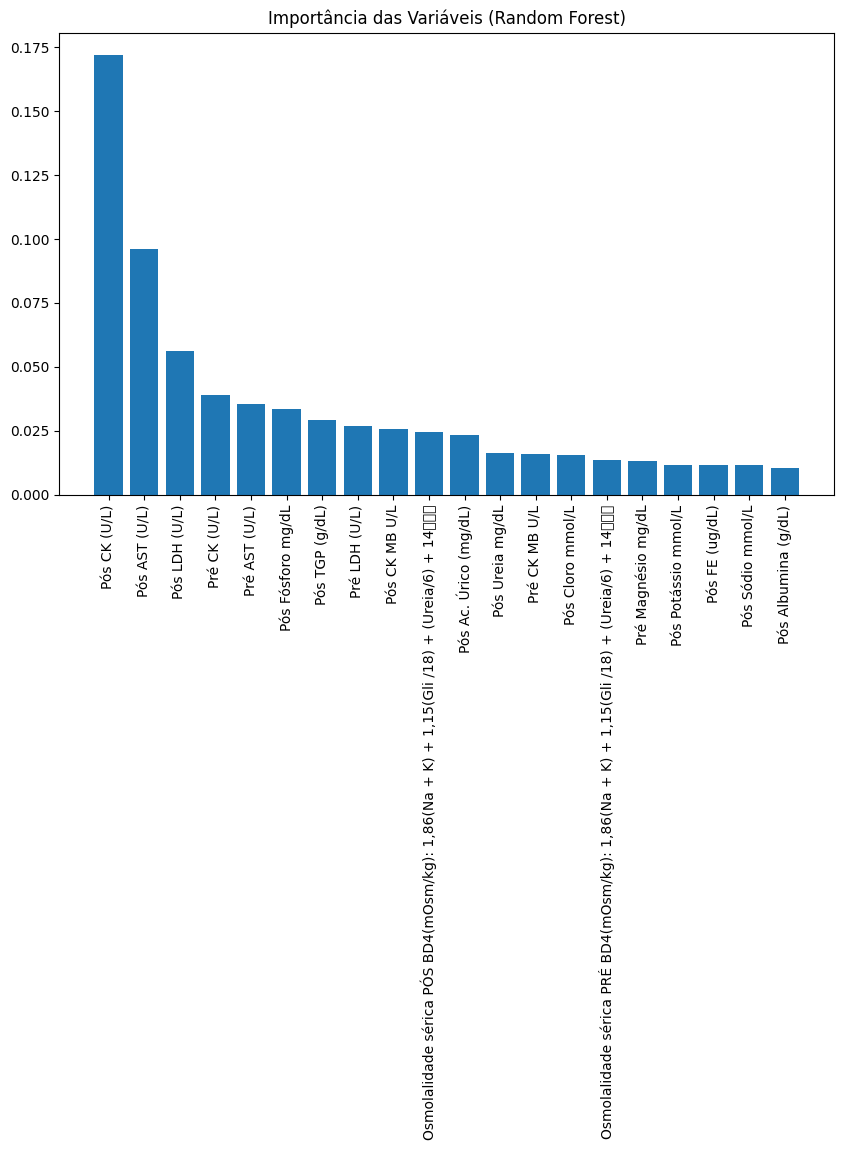

In [14]:
#Utilizando a feature importance do RandomForest

def plot_feature_importance(X_train, y_train, feature_names, top_n=20):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]

    plt.figure(figsize=(10, 6))
    plt.title("Importância das Variáveis (Random Forest)")
    plt.bar(range(top_n), importances[indices], align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': importances[indices]
    })
    importance_df.to_csv(path + "importancia_variaveis.csv", index=False, sep=";")


plot_feature_importance(X_encoded_Train, y_encoded_Train, X_encoded.columns)

**APLICANDO PCA NOS DADOS**

In [ ]:
# NUMBER_COMPONENTS = X_encoded_Train.shape[1]

# import copy
# # Guarda cópias dos dados originais
# X_drop_cols50_Train_original = copy.deepcopy(X_drop_cols50_Train)
# X_drop_cols50_Test_original = copy.deepcopy(X_drop_cols50_Test)
# X_encoded_Train_original = copy.deepcopy(X_encoded_Train)
# X_encoded_Test_original = copy.deepcopy(X_encoded_Test)


# metric_column = "PRECISION"  #Posso escolher qualquer métrica para salvar como melhores metricas: "ACCURACY", "PRECISION", "RECALL", "F1_SCORE"

# # Dicionários para armazenar os melhores resultados por algoritmo
# best_dropcols_results = {}  # Formato: {algoritmo: {"score": valor, "components": n, "results": dataframe_row}}
# best_encoded_results = {}

# # Verifica e imprime os shapes originais
# print("Shapes originais:")
# print(f"X_drop_cols50_Train: {X_drop_cols50_Train_original.shape}")
# print(f"X_encoded_Train: {X_encoded_Train_original.shape}")

# # Determina o número máximo de componentes possíveis para cada conjunto de dados
# max_components_dropcols = min(X_drop_cols50_Train_original.shape[0], X_drop_cols50_Train_original.shape[1])
# max_components_encoded = min(X_encoded_Train_original.shape[0], X_encoded_Train_original.shape[1])
# print(f"Máximo de componentes possíveis para dropcols: {max_components_dropcols}")
# print(f"Máximo de componentes possíveis para encoded: {max_components_encoded}")


# for i in range(1, NUMBER_COMPONENTS):
#     print(f"\n===== Processando com {i} componentes =====")

#     try:
#         # Para X_drop_cols50
#         if i <= max_components_dropcols:

#             pca_drop = PCA(n_components=i)
#             X_drop_cols50_Train_pca = pca_drop.fit_transform(X_drop_cols50_Train_original)
#             X_drop_cols50_Test_pca = pca_drop.transform(X_drop_cols50_Test_original)

#             print(f"PCA aplicado com sucesso em X_drop_cols50: resultado shape = {X_drop_cols50_Train_pca.shape}")


#             results_dropcols_df = get_tests_result(X_drop_cols50_Train_pca, X_drop_cols50_Test_pca,
#                                                  y_drop_cols50_Train, y_drop_cols50_Test)


#             saving_results(results_dropcols_df,
#                           path + f"ResultadosTestesPIBITI/TesteComPCA/DROPCOLS/NUMBER_COMPONENTES_{i}_",
#                           "resultados_rabdomiolise_dropcols.csv")


#             for idx, row in results_dropcols_df.iterrows():
#                 algoritmo = row["ALGORITHM"]
#                 current_score = row[metric_column]

#                 #Verificando se o resultado obtido é maior que a melhor metrica até agora
#                 if algoritmo not in best_dropcols_results or current_score > best_dropcols_results[algoritmo]["score"]:
#                     best_dropcols_results[algoritmo] = {
#                         "score": current_score,
#                         "components": i,
#                         "results": row.to_dict()
#                     }
#                     print(f"Novo melhor resultado para dropcols/{algoritmo}: {metric_column}={current_score} com {i} componentes")
#         else:
#             print(f"Pulando PCA para X_drop_cols50: {i} componentes > {max_components_dropcols}")

#         # Para X_encoded
#         if i <= max_components_encoded:

#             pca_encoded = PCA(n_components=i)
#             X_encoded_Train_pca = pca_encoded.fit_transform(X_encoded_Train_original)
#             X_encoded_Test_pca = pca_encoded.transform(X_encoded_Test_original)

#             print(f"PCA aplicado com sucesso em X_encoded: resultado shape = {X_encoded_Train_pca.shape}")


#             results_encoded_df = get_tests_result(X_encoded_Train_pca, X_encoded_Test_pca,
#                                                 y_encoded_Train, y_encoded_Test)


#             saving_results(results_encoded_df,
#                           path + f"ResultadosTestesPIBITI/TesteComPCA/ENCODED/NUMBER_COMPONENTES_{i}_",
#                           "resultados_rabdomiolise_encoded.csv")


#             for idx, row in results_encoded_df.iterrows():
#                 algoritmo = row["ALGORITHM"]
#                 current_score = row[metric_column]


#                 if algoritmo not in best_encoded_results or current_score > best_encoded_results[algoritmo]["score"]:
#                     best_encoded_results[algoritmo] = {
#                         "score": current_score,
#                         "components": i,
#                         "results": row.to_dict()
#                     }
#                     print(f"Novo melhor resultado para encoded/{algoritmo}: {metric_column}={current_score} com {i} componentes")
#         else:
#             print(f"Pulando PCA para X_encoded: {i} componentes > {max_components_encoded}")

#     except Exception as e:
#         print(f"Erro na iteração {i}: {e}")


# print("\n===== Salvando os melhores resultados por algoritmo =====")


# best_dropcols_rows = []
# best_encoded_rows = []

# # Processa os melhores resultados para dropcols
# for algoritmo, info in best_dropcols_results.items():
#     results_dict = info["results"]
#     results_dict["N_COMPONENTS"] = info["components"]
#     best_dropcols_rows.append(results_dict)
#     print(f"Melhor para dropcols/{algoritmo}: {metric_column}={info['score']} com {info['components']} componentes")

# # Processa os melhores resultados para encoded
# for algoritmo, info in best_encoded_results.items():
#     results_dict = info["results"]
#     results_dict["N_COMPONENTS"] = info["components"]
#     best_encoded_rows.append(results_dict)
#     print(f"Melhor para encoded/{algoritmo}: {metric_column}={info['score']} com {info['components']} componentes")

# # Converte para DataFrames
# if best_dropcols_rows:
#     best_dropcols_df = pd.DataFrame(best_dropcols_rows)
#     saving_results(best_dropcols_df,
#                   path + "ResultadosTestesPIBITI/TesteComPCA/",
#                   "MELHORES_POR_ALGORITMO_dropcols.csv")
#     print("Arquivo de melhores resultados para dropcols salvo com sucesso!")
# else:
#     print("Nenhum resultado válido encontrado para dropcols")

# if best_encoded_rows:
#     best_encoded_df = pd.DataFrame(best_encoded_rows)
#     saving_results(best_encoded_df,
#                   path + "ResultadosTestesPIBITI/TesteComPCA/",
#                   "MELHORES_POR_ALGORITMO_encoded.csv")
#     print("Arquivo de melhores resultados para encoded salvo com sucesso!")
# else:
#     print("Nenhum resultado válido encontrado para encoded")